## Transfer learning

### Try a pre-trained model on random (AI-generated) pics

In [1]:
from keras.utils import load_img, img_to_array
from keras.applications.resnet50 import ResNet50

pretrained_model = ResNet50(weights='imagenet') # the weights parameter means it was already trained on some dataset
print(pretrained_model.summary())

# input layer shows 224x224

Model: "resnet50"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_pad           │ (None, 230, 230,  │          0 │ input_layer[0][0] │
│ (ZeroPadding2D)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_conv (Conv2D) │ (None, 112, 112,  │      9,472 │ conv1_pad[0][0]   │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_bn            │ (None, 112, 112,  │        256 │ conv1_conv[0][0]  │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_relu          │ (None, 112, 112,  │          0 │ conv1_bn[0][0]    │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pad           │ (None, 114, 114,  │          0 │ conv1_relu[0][0]  │
│ (ZeroPadding2D)     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pool          │ (None, 56, 56,    │          0 │ pool1_pad[0][0]   │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_conv │ (None, 56, 56,    │      4,160 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_bn   │ (None, 56, 56,    │        256 │ conv2_block1_1_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_relu │ (None, 56, 56,    │          0 │ conv2_block1_1_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_conv │ (None, 56, 56,    │     36,928 │ conv2_block1_1_r… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_bn   │ (None, 56, 56,    │        256 │ conv2_block1_2_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_relu │ (None, 56, 56,    │          0 │ conv2_block1_2_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_conv │ (None, 56, 56,    │     16,640 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_conv │ (None, 56, 56,    │     16,640 │ conv2_block1_2_r… │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_bn   │ (None, 56, 56,    │      1,024 │ conv2_block1_0_c… │
│ (BatchNormalizatio… │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_bn   │ (None, 56, 56,    │      1,024 │ conv2_block1_3_c

 Total params: 25,636,712 (97.80 MB)

 Trainable params: 25,583,592 (97.59 MB)

 Non-trainable params: 53,120 (207.50 KB)

None


The convolution 1 pad layer transforms spatial data for easier learning by removing extra noise from images. This layer removes the padding from the image, which is like the white boarder around the image. 

The convolution 2 conv, it narrows the image down for a greater focus on the important part of the image. 

If your network is really deep, then signs will get lost in convolution transformations. So, someone had this idea to add the important x value to the end result, so that you can train really deep models effectively. This is what 'add' does. In chatgpt, there was an issue about remembering information from the prompts, and this is what add does, where it takes the x or input, and adds it directly to the y, or output. 

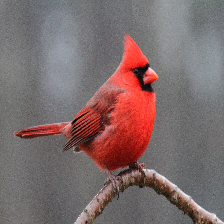

In [30]:
size_ResNet = (224, 224)
img_path = "C:/Users/iandr/OneDrive/Desktop/image_4.png"
img = load_img(img_path, target_size=size_ResNet)
img

In [31]:
x = img_to_array(img)
x.shape

(224, 224, 3)

In [32]:
# make sure it is one sample with 3 dimensions
import numpy as np

x = np.expand_dims(x, axis=0)
x.shape

(1, 224, 224, 3)

In [33]:
preds = pretrained_model.predict(x)
preds.shape

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


(1, 1000)

In [34]:
from keras.applications.resnet50 import decode_predictions
decoded_preds = decode_predictions(preds, top=3)
[(i[1], round(i[2], 4)) for i in decoded_preds[0]]

[('indigo_bunting', 0.7499), ('jay', 0.2305), ('hummingbird', 0.0008)]

### Apply transfer learning for a "real" task

Fun [story](https://youtu.be/vIci3C4JkL0) from HBO's Silicon Valley series from 2017: Shazam for food.

Download the data from [Kaggle](https://www.kaggle.com/datasets/dansbecker/hot-dog-not-hot-dog).

In [ ]:
from os import path

folder_where_data_resides = "../../data/hotdog/"

# Look at an example hot_dog:
hot_dog = load_img(path.join(folder_where_data_resides, "train/hot_dog/1000288.jpg"), target_size=size_ResNet)
hot_dog

In [ ]:
# Look at an example not hot_dog
not_hot_dog = load_img(path.join(folder_where_data_resides, "train/not_hot_dog/100135.jpg"), target_size=size_ResNet)
not_hot_dog

In [ ]:
def preprocess_image(img):
    return np.expand_dims(img_to_array(img), axis=0)

def predict_top_classes(preprocessed_img):
    preds = pretrained_model.predict(preprocessed_img)
    decoded_preds = decode_predictions(preds, top=3)
    return [(i[1], round(i[2], 4)) for i in decoded_preds[0]]


In [ ]:
print("Prediction for a sample hot dog:", predict_top_classes(preprocess_image(hot_dog)))
print("Prediction for a sample not hot dog:", predict_top_classes(preprocess_image(not_hot_dog)))

### Load the whole data in batches

In [ ]:
# Load data
from keras.utils import image_dataset_from_directory

train_dataset = image_dataset_from_directory(path.join(folder_where_data_resides, "train"), batch_size=32, image_size=size_ResNet)
test_dataset = image_dataset_from_directory(path.join(folder_where_data_resides, "train"), batch_size=32, image_size=size_ResNet)

train_dataset

In [ ]:
for images, labels in train_dataset.take(1):
    print("Batch shape:", images.shape, labels.shape)

In [ ]:
import matplotlib.pyplot as plt
from keras.utils import array_to_img

# Take 1 batch and look for the first 15 images:
for images, labels in train_dataset.take(1):
    for i in range(15):
        plt.subplot(3, 5, i+1)
        plt.imshow(array_to_img(images[i]))
        plt.title(train_dataset.class_names[labels[i]])
        plt.axis("off")
    plt.show()

### Build a CNN for this task from scratch

In [ ]:
# Use the model we ended up with the digit recognition example
from keras.models import Sequential
from keras.layers import Input, Dense, Conv2D, MaxPooling2D, Flatten, Dropout

# Build the model

# Compile the model and print summary

# Fit the model (with early stopping) and look at validation accuracy


### Fine-tune a pre-defined model for our task

We can fine-tune a pre-trained model for our purposes by modifying the last few layers, and learn only the new parameters on new data (freezing the weights of the original network).

In [ ]:
# Load pre-trained ResNet50 model without the top layers as we do not want to classify for 1000 classes but only simple binary
base_model = ResNet50(weights="imagenet", include_top=False, input_shape=size_ResNet + (3,))  # concatenating tuples

print(base_model.summary())

Some of the parameters are non-trainable: these correspond to batch normalization layers that applies a transformation to maintain the mean output close to 0 and the output standard deviation close to 1. Mean and standard deviation are parameters that are not updated during backpropagation.

In [ ]:
# Freeze the layers of the pre-trained model
base_model.trainable = False

len(base_model.trainable_variables)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GlobalAveragePooling2D

fine_tuned_model = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dense(256, activation="relu"),
    Dense(1, activation="sigmoid")
])

# Compile the model
fine_tuned_model.compile(optimizer="adam", loss='binary_crossentropy', metrics=['accuracy'])

print(fine_tuned_model.summary())

Unfortunately, the `Sequential` API cannot show us the number of parameters. Let's use the `Model` API instead which is more versatile.

In [ ]:
from tensorflow.keras.models import Model

output = base_model.output
output = GlobalAveragePooling2D()(output)
output = Dense(256, activation="relu")(output)
output = Dense(1, activation="sigmoid")(output)
fine_tuned_model = Model(inputs=base_model.input, outputs=output)

fine_tuned_model.compile(optimizer="adam", loss='binary_crossentropy', metrics=['accuracy'])

print(fine_tuned_model.summary())

In [ ]:
# Fit the fine-tuned the model (batch size already defined)
fine_tuned_model.fit(train_dataset, epochs=10, validation_data=test_dataset, callbacks=[EarlyStopping(monitor='val_accuracy', patience=5)])

# Evaluate the model
loss, accuracy = fine_tuned_model.evaluate(test_dataset)
print('Test accuracy:', round(accuracy, 4))

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_openml

# fetch dataset (takes a while)
adult = fetch_openml(name="adult", version=2) 

adult.frame.info() 

In [ ]:
print(adult.DESCR)

In [ ]:
import numpy as np
y = adult.frame["class"]
X = adult.frame.drop(columns=["class"])

prng = np.random.RandomState(20240325)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=prng)

In [ ]:
y.value_counts().plot(kind="bar")

In [ ]:
X.isnull().sum()

### Benchmark: logistic regression (sklearn)

By default, sklearn Transformers return Numpy arrays. Thus, even though we input a Pandas DataFrame with the names of the features, we will lose them on the pipeline execution. This is a bad thing when we need to explain our model using, for example, feature importances, because we are no able to track feature names natively.
You can explicitly set the output to keep the Pandas output with `set_config`. [Source](https://medium.com/@anderson.riciamorim/how-to-keep-feature-names-in-sklearn-pipeline-e00295359e31)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import SimpleImputer
from sklearn import set_config

set_config(transform_output="pandas")  # ensure that the transformations return pandas df instead of numpy arrays (thus, they preserve column names e.g.)

# preprocess
one_hot_encoder = OneHotEncoder(sparse_output=False, drop="first", handle_unknown="ignore")
categorical_vars = X.select_dtypes(include="category").columns.to_list()

column_transformer = ColumnTransformer(
    [("create_dummies", one_hot_encoder, categorical_vars)],
    remainder="passthrough"
)

pipe_logit = Pipeline([
    ("impute", SimpleImputer(strategy="constant", fill_value="missing")),
    ("preprocess", column_transformer),
    ("scale", MinMaxScaler()),
    ("logit", LogisticRegression(penalty=None, random_state=prng))
])
pipe_logit

In [ ]:
pipe_logit.fit(X_train, y_train)

In [ ]:
from sklearn.metrics import roc_auc_score
import warnings

predicted_probs = pipe_logit.predict_proba(X_test)[:, 1]

auc_score_test = roc_auc_score(y_test, predicted_probs)
print(f"AUC on the test set for simple logit is {round(auc_score_test, 4)}")

In [ ]:
pipe_logit["logit"].coef_.shape

In [ ]:
pipe_logit["logit"].feature_names_in_

In [ ]:
# keep only categories that have enough observations, put the others into an "infrequent" group
one_hot_encoder = OneHotEncoder(sparse_output=False, drop="first", min_frequency=100, handle_unknown="infrequent_if_exist")

column_transformer = ColumnTransformer(
    [("create_dummies", one_hot_encoder, categorical_vars)],
    remainder="passthrough",
    verbose_feature_names_out=False  # keep variable names shorter
)

pipe_logit = Pipeline([
    ("impute", SimpleImputer(strategy="constant", fill_value="missing")),
    ("preprocess", column_transformer),
    ("scale", MinMaxScaler()),
    ("logit", LogisticRegression(penalty=None, random_state=prng, max_iter=1000))
])
pipe_logit.fit(X_train, y_train)
pipe_logit["logit"].feature_names_in_

In [ ]:
predicted_probs = pipe_logit.predict_proba(X_test)[:, 1]

auc_score_test = roc_auc_score(y_test, predicted_probs)
print(f"AUC on the test set for the interpretable logit is {round(auc_score_test, 4)}")

In [ ]:
import pandas as pd
model_summary = pd.DataFrame({
    "feature": pipe_logit["logit"].feature_names_in_,
    "coefficient": pipe_logit["logit"].coef_[0]
})
pd.options.display.float_format = '{:.4f}'.format
model_summary

The logistic regression model uses the sigmoid function to transform the real line into [0, 1]

$$
P(Y=1) = sigmoid(\beta_0 + \beta_1 X_1 + ... + \beta_k X_k)
$$

As 

$$
sigmoid(x) = \frac{1}{1 + \exp(-x)}
$$

with some restructuring we can get a result showing that logistic regression is a linear model for the log odds:

$$
\log\left(\frac{P(Y=1)}{1 - P(Y=1)}\right) = \log(odds) = \beta_0 + \beta_1 X_1 + ... + \beta_k X_k
$$

From here we can derive that a change in a feature by one unit changes the odds ratio (multiplicative) by a factor of the exponential of its coefficient:

$$
\frac{odds(x_j + 1)}{odds(x_j)} = \exp(\beta_j)
$$

In [ ]:
model_summary["odds_ratio"] = np.exp(model_summary["coefficient"])
model_summary.sort_values(by="odds_ratio", ascending=False)

In [ ]:
import matplotlib.pyplot as plt
top_coeffs = model_summary.sort_values(by="coefficient", ascending=True).tail(20)
plt.barh(top_coeffs.feature, top_coeffs.odds_ratio)
plt.xlabel("Odds ratio")
plt.title("Odds ratio of the top 20 positive factors")
plt.axvline(x=1, color="darkred", linestyle="--")
plt.show()

In [ ]:
bottom_coeffs = model_summary.sort_values(by="coefficient", ascending=True).head(20)
plt.barh(bottom_coeffs.feature, bottom_coeffs.odds_ratio)
plt.xlabel("Odds ratio")
plt.title("Odds ratio of the top 20 negative factors")
plt.axvline(x=1, color="darkred", linestyle="--")
plt.show()

Is scaling a good idea?
Without scaling the coefficients could be easier to interpret. However, convergence is much harder to achieve.

### Permutation-based feature importance

In [ ]:
from sklearn.inspection import permutation_importance
import warnings

with warnings.catch_warnings():
    warnings.filterwarnings("ignore", message="Found unknown categories*")
    varimp_permutation = permutation_importance(pipe_logit, X_test, y_test, n_repeats=10, scoring="roc_auc", random_state=prng)   # could run in parallel with n_jobs=-1 but then suppressing the warnings is more complicated

In [ ]:
varimp_sorted_idx = varimp_permutation.importances_mean.argsort()

plt.boxplot(
    varimp_permutation.importances[varimp_sorted_idx].T, 
    labels=X.columns[varimp_sorted_idx],
    vert=False
)
plt.axvline(x=0, color="darkred", linestyle="--")
plt.xlabel("Decrease in AUC (ROC) score")
plt.title("Permutation based feature importance (test set)")
plt.show()

### Partial dependence plots

In [ ]:
from sklearn.inspection import PartialDependenceDisplay
import warnings

fig, ax = plt.subplots(figsize=(15, 5))

with warnings.catch_warnings():
    warnings.filterwarnings("ignore", message="Found unknown categories*")
    PartialDependenceDisplay.from_estimator(
        pipe_logit, X_test, 
        features=["marital-status", "capital-gain", "education", ("marital-status", "education")], 
        categorical_features=["marital-status", "education"], 
        n_cols=4, ax=ax
    )

### Logistic regression with interpret

In [ ]:
from interpret import set_visualize_provider
from interpret.provider import InlineProvider
set_visualize_provider(InlineProvider())

from interpret.glassbox import LogisticRegression as ILogisticRegression
interpret_logit_pipe = Pipeline([
    ("impute", SimpleImputer(strategy="constant", fill_value="missing")),
    ("preprocess", column_transformer),
    ("logit", ILogisticRegression(penalty=None, random_state=prng, max_iter=1000))
])

In [ ]:
interpret_logit_pipe.fit(X_train, y_train)

In [ ]:
predicted_probs = interpret_logit_pipe.predict_proba(X_test)[:, 1]

auc_score_test = roc_auc_score(y_test, predicted_probs)
print(f"AUC on the test set for interpret logit is {round(auc_score_test, 4)}")  # same as before as it is only a wrapper around sklearn

### Glassbox explainers

#### Global: coefficient values (marginal contribution to log odds)

In [ ]:
from interpret import show
logit_global = interpret_logit_pipe["logit"].explain_global(name="Logit")
show(logit_global)

Unfortunately, interpret's explainers cannot work on Pipelines directly, so we have to transform the test data separately (using the transformation steps of the Pipeline).

#### Local: individual predictions (weight * feature value within sigmoid)

In [ ]:
logit_local = interpret_logit_pipe["logit"].explain_local(interpret_logit_pipe[:-1].transform(X_test)[:15], y_test[:15], name="Logit")
show(logit_local)

### Explainable Boosting Machine (EBM)

EBM is a glassbox model, designed to have accuracy comparable to state-of-the-art machine learning methods like Random Forest and Boosted Trees, while being highly intelligibile and explainable. EBM is a generalized additive model. See [this video](https://www.youtube.com/watch?v=MREiHgHgl0k&ab_channel=MicrosoftDeveloper) for more detail.

In [ ]:
from interpret.glassbox import ExplainableBoostingClassifier

# as EBM is based on trees, it can handle categorical features so no need for one-hot-encoding
ebm_pipe = Pipeline([
    ("impute", SimpleImputer(strategy="constant", fill_value="missing")),
    ("ebm", ExplainableBoostingClassifier(random_state=20240325))  # cannot accept RandomState directly
])
ebm_pipe.fit(X_train, y_train)  

auc = roc_auc_score(y_test, ebm_pipe.predict_proba(X_test)[:, 1])
print(f"AUC on the test set for EBM is {round(auc, 4)}")

In [ ]:
show(ebm_pipe["ebm"].explain_global(name="EBM"))

In [ ]:
show(ebm_pipe["ebm"].explain_local(X_test[:15], y_test[:15], name="EBM"))

### Comparison: Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# sklearn cannot handle categorical features so we need to one-hot-encode
rf_pipe = Pipeline([
    ("impute", SimpleImputer(strategy="constant", fill_value="missing")),
    ("preprocess", column_transformer),
    ("rf", RandomForestClassifier(random_state=20240325))
])

rf_pipe.fit(X_train, y_train)
predicted_probs = rf_pipe.predict_proba(X_test)[:, 1]

auc_score_test = roc_auc_score(y_test, predicted_probs)
print(f"AUC on the test set for RF is {round(auc_score_test, 4)}")

### Blackbox explainers

#### Some data manipulation to make categorical explanations easier

Unfortunately, categorical features are not handled automatically, so we need to do some workarounds.

1. Label encode categorical variables so that they are represented by numbers (strings would throw errors).
2. Store the categories represented by the coded numeric values for each variable.
3. Do one-hot encoding for modelling (but not for explanation).


In [ ]:
# Label encoding (encode missings as well) & Save category values
from sklearn.preprocessing import LabelEncoder

X_encoded = X
category_names = {}
for var in categorical_vars:
    label_encoder = LabelEncoder()
    label_encoder.fit(X[var])
    X_encoded[var] = label_encoder.transform(X[var])
    category_names[var] = label_encoder.classes_

category_names

In [ ]:
# Data transformation on the whole data
prng = np.random.RandomState(20240325)
X_train_encoded, X_test_encoded, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=prng)

In [ ]:
(X_train.iloc[0], X_train_encoded.iloc[0])

In [ ]:
# Retain the model to ensure one-hot-encoded features correspond to the same
rf_pipe_encoded = Pipeline([
    ("preprocess", column_transformer),
    ("rf", RandomForestClassifier(random_state=20240325))
])

rf_pipe_encoded.fit(X_train, y_train)
predicted_probs = rf_pipe_encoded.predict_proba(X_test)[:, 1]

auc_score_test = roc_auc_score(y_test, predicted_probs)
print(f"AUC on the test set for encoded RF is {round(auc_score_test, 4)}")

#### PDP

In [ ]:
from interpret.blackbox import PartialDependence

feature_types = ["nominal" if v in categorical_vars else "continuous" for v in X.columns]

with warnings.catch_warnings():
    warnings.filterwarnings("ignore", message="Found unknown categories*")
    pdp = PartialDependence(
        rf_pipe_encoded, X_test_encoded, 
        feature_names=X.columns.to_list(), 
        feature_types=feature_types
    )

show(pdp.explain_global(), 0)

#### Lime

In [ ]:
!python -m pip install lime

In [ ]:
from interpret.blackbox import LimeTabular
from sklearn.preprocessing import LabelEncoder

lime = LimeTabular(
    rf_pipe_encoded, X_train_encoded,
    categorical_features=categorical_vars, 
    categorical_names=category_names, 
    kernel_width=3,
    random_state=20240325
)

# LimeTabular expects numeric labels so we need to encode it first
y_test_numeric = LabelEncoder().fit_transform(y_test)
show(lime.explain_local(rf_pipe[:-1].transform(X_test[:15]), y_test_numeric[:15], name="LIME"))

#### Shapley

Takes a while...

In [ ]:
from interpret.blackbox import ShapKernel

shap_kernel = ShapKernel(rf_pipe[-1], rf_pipe[:-1].transform(X_train))
show(shap_kernel.explain_local(rf_pipe[:-1].transform(X_test)[:15], y_test[:15]), name = "SHAP")